# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


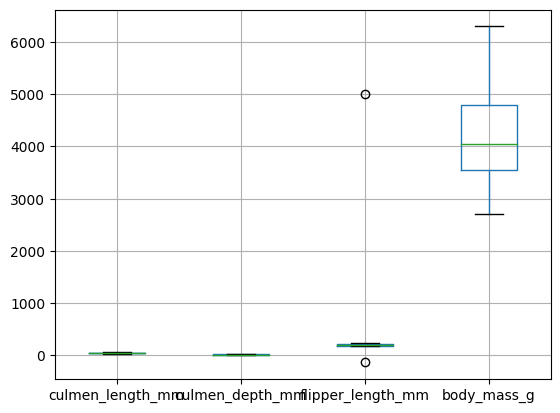

155.5 247.5
[9, 14]


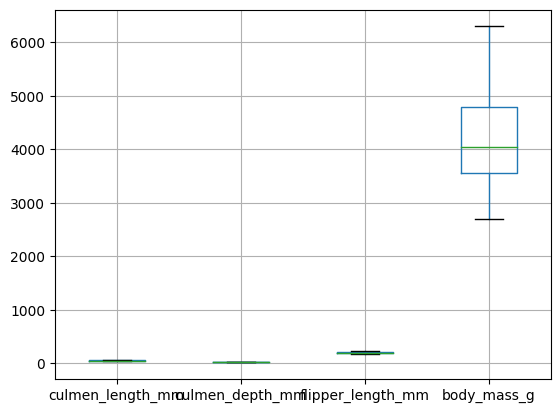

In [201]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")

penguins_df.head()
penguins_df.info()
penguins_df = penguins_df.dropna()
penguins_df.boxplot()
plt.show()


# Handling outliers in the flipper_length_mm column

# Calculate the first and third quartile
Q1 = penguins_df['flipper_length_mm'].quantile(0.25)
Q3 = penguins_df['flipper_length_mm'].quantile(0.75)

# Interquartile range
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

#Identify outliers
outliers = (penguins_df['flipper_length_mm'] < lower_bound) | (penguins_df['flipper_length_mm'] > upper_bound)
outliers_data = penguins_df[outliers]
print(outliers_data.index.tolist())
penguins_clean = penguins_df.drop(outliers_data.index.tolist()) 

penguins_clean.boxplot()
plt.show()

In [202]:
# Handling categorical column sex

df = pd.get_dummies(penguins_clean).drop("sex_.", axis=1)

# Preprocessing

stdscaler = StandardScaler()
penguins_preprocessed = stdscaler.fit_transform(df)
penguins_preprocessed

array([[-0.90552018,  0.79312591, -1.42812496, -0.56970896, -0.99103121,
         0.99700149],
       [-0.83193838,  0.12850298, -1.07152207, -0.50757924,  1.00904996,
        -1.00300753],
       [-0.68477478,  0.43525202, -0.42963687, -1.1910061 ,  1.00904996,
        -1.00300753],
       ...,
       [ 1.17316569, -0.74061931,  1.49601872,  1.91547962, -0.99103121,
         0.99700149],
       [ 0.21660228, -1.20074288,  0.78281295,  1.23205276,  1.00904996,
        -1.00300753],
       [ 1.08118844, -0.53611995,  0.85413352,  1.48057162, -0.99103121,
         0.99700149]])

In [203]:
# Performing PCA

pca = PCA()
pca.fit(penguins_preprocessed)
pca.explained_variance_ratio_

#Choosing the number of component
n_components = 2

pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)


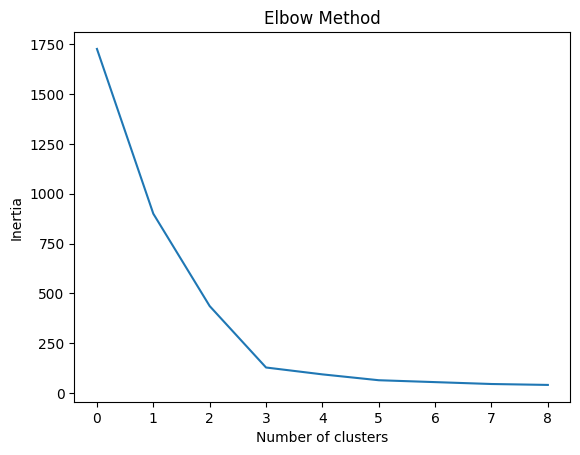

In [204]:
# Performing  Elbow analysis
inertia = list()
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
plt.plot(inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

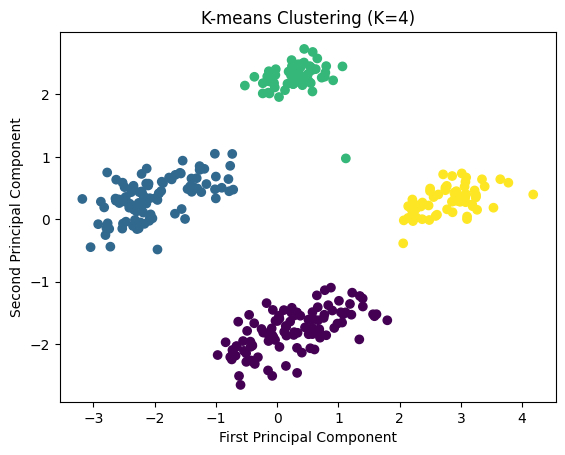

In [205]:
# The optimal number of clusters
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()

In [206]:
# Creating a final statistical DataFrame for each cluster.
penguins_clean['label'] = kmeans.labels_

numeric_columns= ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g']

stat_penguins = penguins_clean.groupby('label')[numeric_columns].mean()

stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,40.217757,17.611215,189.046729,3419.158879
2,45.545763,14.262712,212.779661,4683.050847
3,49.473770,15.718033,221.540984,5484.836066
